**Membangun sistem rekomendasi untuk brand di Ecommerce**



Membangun rekomendasi sistem brand, di mana harus merekomendasikan produk dari brand tertentu berdasarkan harga. dengan adanya sistem rekomendasi ini, dapat mempermudah konsumen untuk memilih brand/produk yang sesuai dengan prefensinya masing2, sehingga dapat meningkatkan user experience.

`Dataset:` https://www.kaggle.com/datasets/shivamb/fashion-clothing-products-catalog/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
file_dirs = "/content/drive/MyDrive/Backup Laptop/Zakiy/Dibimbing.id/Final Project/Dataset/2"
os.chdir(file_dirs)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_column', None)

#Load Dataset

In [ ]:
df = pd.read_csv ('myntra_products_catalog.csv')
df

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [ ]:
fashion = df.copy()
fashion

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


#Data Preparation

In [ ]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [ ]:
fashion['PrimaryColor'].unique()

array([' Black', ' Beige', ' Pink', 'Blue', ' White', ' Brown',
       ' Burgundy', ' Red', ' Green', nan, ' Maroon', ' Navy', ' Gold',
       ' Yellow', ' Grey', ' Platinum', ' Silver', ' Khaki', ' Mustard',
       ' Lavender', ' Matte', ' Rose', ' Charcoal', ' Purple', ' Orange',
       ' Peach', ' Magenta', ' Bronze'], dtype=object)

In [ ]:
fashion.isna().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

terdapat missing value pada kolom primary color

In [ ]:
fashion['PrimaryColor'].mode()

0    Blue
Name: PrimaryColor, dtype: object

In [ ]:
fashion.fillna("Blue", inplace = True)
fashion.isna().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

missing value pada primary color diubah ke nilai paling banyak(blue)

In [ ]:
fashion.duplicated().sum()

0

tidak terdapat duplicate pada data

In [ ]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  12491 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


* missing value pada primary color telah berhasil di-handling

In [ ]:
for col in fashion.columns :
  print('=='*50)
  print(col,fashion[col].unique())

ProductID [10017413 10016283 10009781 ... 10261607 10266621 10265199]
ProductName ['DKNY Unisex Black & Grey Printed Medium Trolley Bag'
 'EthnoVogue Women Beige & Grey Made to Measure Custom Made Kurta Set with Jacket'
 'SPYKAR Women Pink Alexa Super Skinny Fit High-Rise Clean Look Stretchable Cropped Jeans'
 ... '612 league Girls Navy Blue & White Printed Regular Fit Denim Shorts'
 'Bvlgari Men Aqva Pour Homme Marine Eau de Toilette 150ml'
 'Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt']
ProductBrand ['DKNY' 'EthnoVogue' 'SPYKAR' 'Raymond' 'Parx' 'SHOWOFF' 'Kenneth Cole'
 'Police' 'Vishudh' 'Being Human' 'Homesake' 'SEJ by Nisha Gupta'
 'YAK YAK' 'PARFAIT' 'Michael Kors' 'HIGHLANDER' 'JEWEL JUNCTION' 'ID'
 'Story@home' 'Gini and Jony' 'Sera' 'AccessHer' 'Alcis'
 'Difference of Opinion' 'Tokyo Talkies' 'ANNA SUI' 'her by invictus'
 'Soie' 'Lara Karen' 'Urban Dog' 'ahilya' 'VASTRAMAY' 'Campus Sutra'
 'FIDO DIDO' 'MIAH Decor' 'BuckleUp' 'Peter England' 'AIGNER' 'Lady Lyka'
 '

#EDA

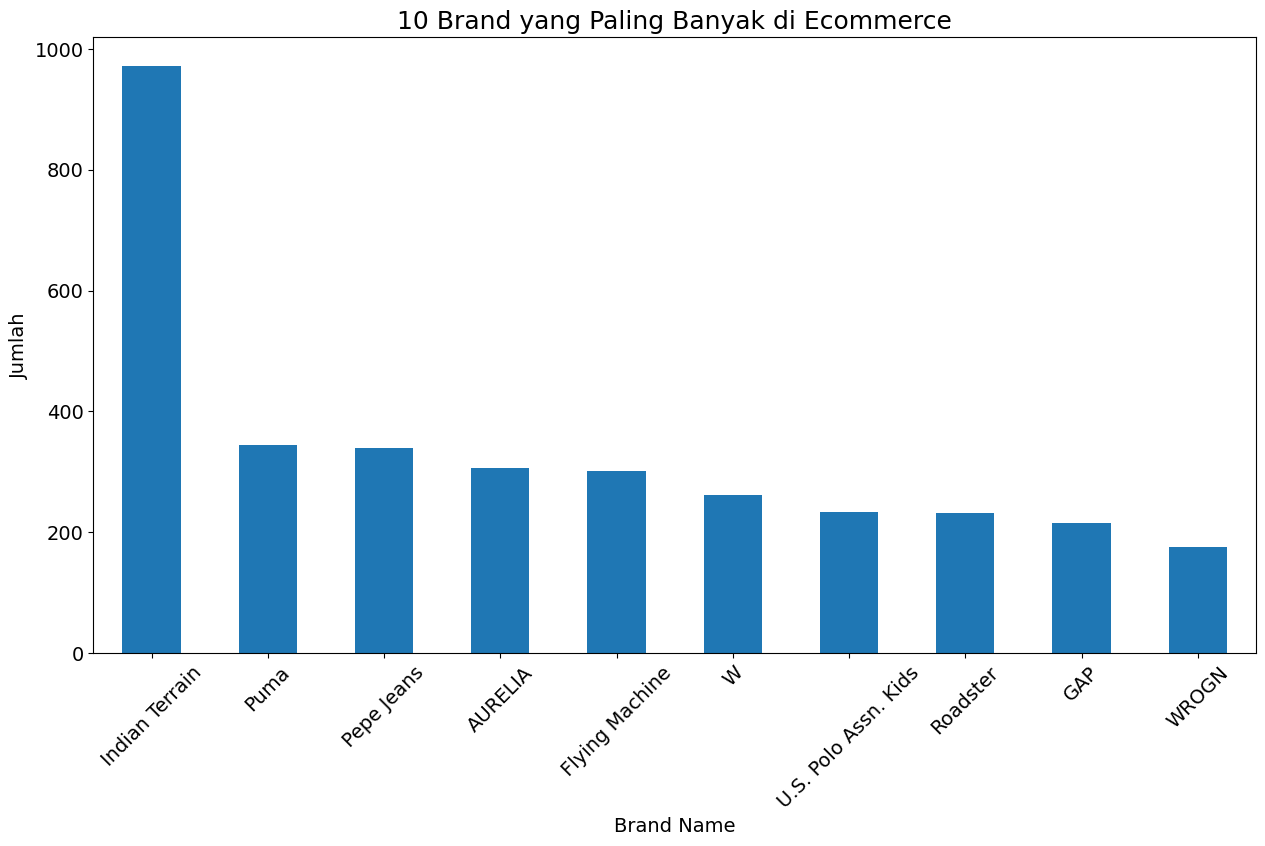

In [ ]:
#Brand yang paling banyak di Ecommerce

plt.figure(figsize=(15,8))
fashion['ProductBrand'].value_counts().iloc[:10].plot(kind='bar')
plt.xlabel("Brand Name", size=14)
plt.xticks(rotation=45,fontsize=14)
plt.ylabel("Jumlah", size=14)
plt.yticks(fontsize=14)
plt.title("10 Brand yang Paling Banyak di Ecommerce", size=18)
plt.show()

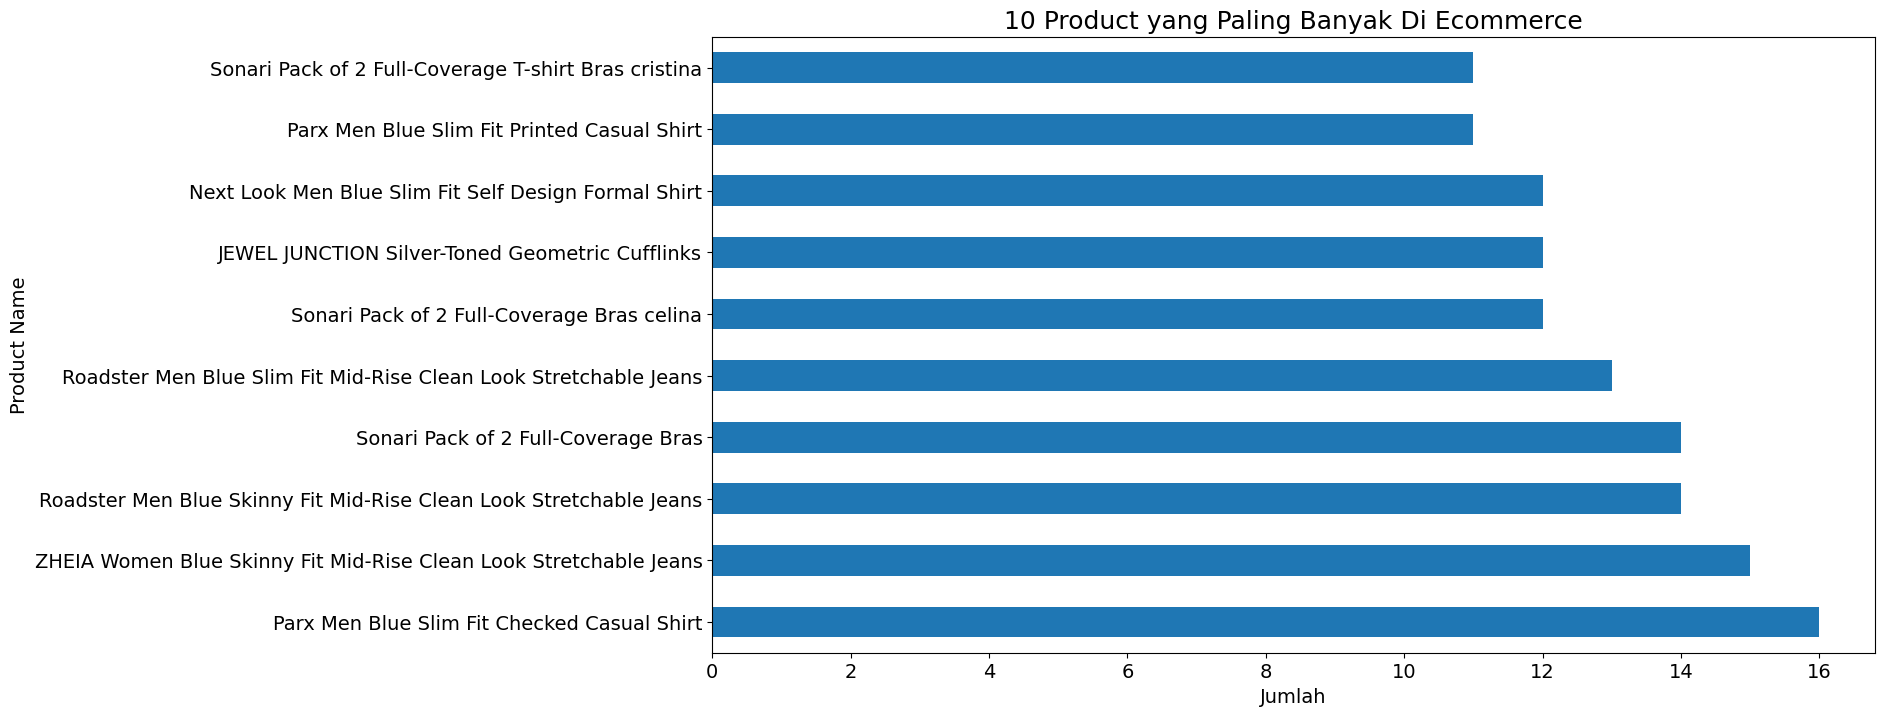

In [ ]:
# 10 Product yang Paling Banyak Di Ecommerce
plt.figure(figsize=(15,8))
fashion['ProductName'].value_counts().sort_values(ascending=False).iloc[:10].plot(kind='barh')
plt.xlabel("Jumlah", size=14)
plt.xticks(fontsize=14)
plt.ylabel("Product Name", size=14)
plt.yticks(fontsize=14)
plt.title("10 Product yang Paling Banyak Di Ecommerce", size=18)
plt.show()

product `Parx` terdapat banyak pada Ecommerce, akan tetapi tidak termasuk ke dalam brand yang terbanyak pada Ecommerce

In [ ]:
fashion[fashion['ProductName'] == 'Parx Men Blue Slim Fit Checked Casual Shirt']

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
6,10017869,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,719,5,"Blue checked casual shirt, has a spread collar...",Blue
36,10017781,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,769,5,"Blue checked casual shirt, has a spread collar...",Blue
77,10017923,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,859,5,"Blue checked casual shirt, has a spread collar...",Blue
79,10017595,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,939,5,"Blue checked casual shirt, has a spread collar...",Blue
101,10017835,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,839,5,"Blue checked casual shirt, has a spread collar...",Blue
144,10017599,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,699,5,"Blue checked casual shirt, has a spread collar...",Blue
153,10017719,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,734,5,"Blue checked casual shirt, has a spread collar...",Blue
319,10017603,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,679,5,"Blue checked casual shirt, has a spread collar...",Blue
361,10017695,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,752,5,"Blue checked casual shirt, has a spread collar...",Blue
425,10017841,Parx Men Blue Slim Fit Checked Casual Shirt,Parx,Men,752,5,"Blue checked casual shirt, has a spread collar...",Blue


In [ ]:
#10 Brand dengan Rata-rata Harga Terbesar

fashion.groupby(['ProductBrand'])[['Price (INR)']].agg('mean').sort_values(by='Price (INR)',ascending=False).iloc[:10]

,Price (INR)
ProductBrand,
Garmin,63090.000000
MOVADO,49192.666667
Maserati,23200.000000
SEIKO,18438.888889
BERING,16941.800000
DKNY,14814.482759
Jacques Lemans,11100.000000
PRESTO,10981.076923
MASPAR,9499.000000


dari 10 brand yg terbanyak terdapat di ecommerce, `Indian Terrain`, `Puma`, dan `Pepe Jeans` tidak termasuk dalam 10 Brand termahal

In [ ]:
#10 Brand dengan Rata-rata Harga Terkecil

fashion.groupby(['ProductBrand'])[['Price (INR)']].agg('mean').sort_values(by='Price (INR)',ascending=True).iloc[:10]

,Price (INR)
ProductBrand,
Envy,139.000000
Ponds,158.333333
Rosaline,291.000000
St. Ives,299.000000
Morpheme Remedies,299.666667
INCOLOR,322.761905
UNKNOWN by Ayesha,324.000000
BEARDO,330.500000
Foolzy,339.000000


In [ ]:
#10 product dengan Rata-rata Harga Termahal

fashion.groupby(['ProductName'])[['Price (INR)']].agg('mean').sort_values(by='Price (INR)',ascending=False).iloc[:10]

,Price (INR)
ProductName,
Garmin Unisex Blue Forerunner 945 Smartwatch 010-02063-71,63090.0
Garmin Unisex Black Forerunner 945 Smartwatch 010-02063-70,63090.0
MOVADO Men Black Analogue Watch 607243,58854.0
MOVADO Women Blue Analogue Watch 607268,56192.0
SEIKO Solar Women Silver Analogue watch SUP428P1,34500.0
MOVADO Men Blue Swiss-Made Analogue Watch 607197,32532.0
DKNY Unisex Purple Large Trolley Bag,31100.0
PRESTO Beige & Black Printed Handmade Anti-Skid Woolen Carpet,29998.0
SEIKO Solar Women Off White Analogue watch SUP432P1,29500.0


Garmin, MOVADO, SEIKO, DKNY, dan PRESTO tetap termasuk product termahal

In [ ]:
#10 product dengan Rata-rata Harga Terendah

fashion.groupby(['ProductName'])[['Price (INR)']].agg('mean').sort_values(by='Price (INR)',ascending=True).iloc[:10]

,Price (INR)
ProductName,
Organic Harvest Unisex Sulphate Free Skin Lightening Face Wash 50g,90.0
Organic Harvest Unisex Shine & Glow Sheet Mask 20gm,91.0
Organic Harvest Unisex Moisturising Sheet Face Mask 20g,91.0
Organic Harvest Unisex Anti-Wrinkle Sheet Face Mask 20g,91.0
Organic Harvest Unisex Anti-Acne Sheet Face Mask 20g,91.0
Ponds Men Daily Defence SPF 30 Face Creme 55 g,132.0
Ponds Super Light Gel Oil Free Moisturiser 73 g,134.0
Envy Men Absolute Perfume Deodorant Spray - 120 ml,139.0
Organic Harvest Unisex Sulphate Free Oil Control Face Wash 100g,150.0


rata-rata produk/brand termurah didominasi oleh produk/brand skincare dan bodycare

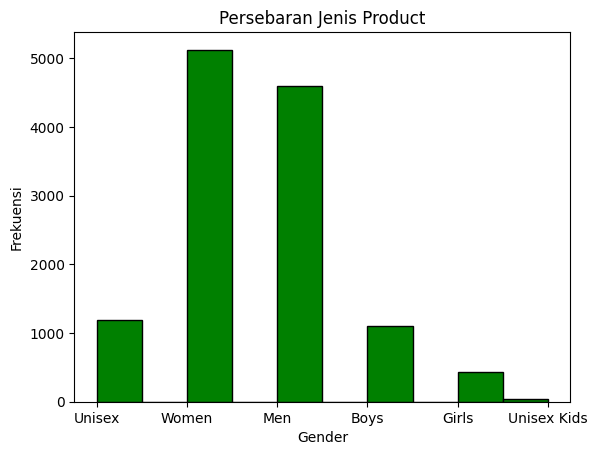

In [ ]:
plt.hist(fashion['Gender'], bins=10, color='Green', edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.title('Persebaran Jenis Product')
plt.show()

jenis product yang paling sering terdapat di ecommerce adalah section `Women` dan `Men`

In [ ]:
rentang_harga = (fashion
            .groupby(['Price (INR)'])
            .agg(frekuensi=('Price (INR)','count'))
            .reset_index()
            .sort_values('frekuensi',ascending=False)
            .head(20)
            )
rentang_harga

,Price (INR),frekuensi
321,699,510
703,1299,464
965,1999,312
247,599,295
473,899,254
540,999,196
176,499,183
358,749,183
270,629,178
138,449,175


distribusi harga didominasi dengan produk di <3000 INR

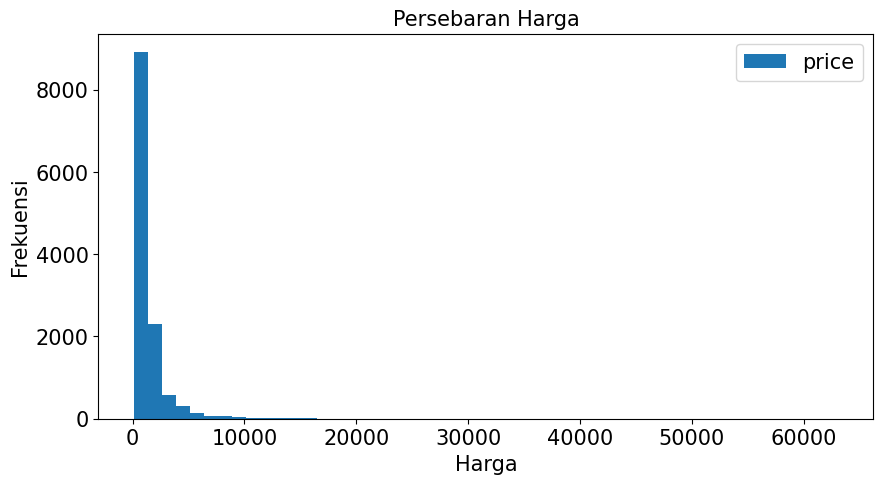

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(fashion['Price (INR)'], bins=50, label='price')
plt.title('Persebaran Harga', fontsize=15)
plt.xlabel('Harga', fontsize=15)
plt.ylabel('Frekuensi', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

#Rekomendasi Berdasarkan Brand

In [ ]:
def recommend_product_by_brand(x):
  recommend = fashion[fashion['ProductBrand']==x][['ProductName', 'Price (INR)']]
  recommend = recommend.sort_values(by = 'Price (INR)',ascending=True)
  return recommend.head(10)

In [ ]:
recommend_product_by_brand('Parx')

,ProductName,Price (INR)
404,Parx Men White Printed Round Neck T-shirt,349
400,Parx Men Blue Striped Polo Collar T-shirt,384
500,Parx Men White Printed Round Neck T-shirt,454
931,Parx Men Peach-Coloured Solid Polo Collar T-shirt,489
426,Parx Men Peach-Coloured Solid Round Neck T-shirt,489
744,Parx Men Blue Printed Polo Collar T-shirt,489
703,Parx Men Pink & Blue Striped Polo Collar T-shirt,489
900,Parx Men Blue Striped Polo Collar T-shirt,489
879,Parx Men Black Printed Round Neck T-shirt,489
8114,Parx Men Black Printed Round Neck T-shirt,503


In [ ]:
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [ ]:
@interact
def recommend_product_by_brand(brand_name = list(fashion['ProductBrand'].value_counts().index)):
  recommend = fashion[fashion['ProductBrand']==brand_name][['ProductName','Price (INR)']]
  recommend = recommend.sort_values(by = 'Price (INR)',ascending=True)
  return recommend.head(10)

interactive(children=(Dropdown(description='brand_name', options=('Indian Terrain', 'Puma', 'Pepe Jeans', 'AUR…

# Conten-based filtering Recommendation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import random
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
fashion

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Blue


In [ ]:
#description checking

def print_description(index):
    example = fashion[fashion.index == index][['Description', 'ProductBrand', 'ProductName']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Brand:', example[1])
        print('Produk:', example[2])

print_description(2)

Pink coloured wash 5-pocket high-rise cropped jeans, clean look, no fade, has a button and zip closure, and waistband with belt loops
Brand: SPYKAR
Produk: SPYKAR Women Pink Alexa Super Skinny Fit High-Rise Clean Look Stretchable Cropped Jeans


In [ ]:
#Text Preprocessing

clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z #+_]')
stopword = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = clean_spcl.sub(' ', text)
    text = clean_symbol.sub('', text)
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text

#kolom tambahan untuk data description yang telah dibersihkan
fashion['desc_clean'] = fashion['Description'].apply(clean_text)

In [ ]:
fashion

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor,desc_clean
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black,black grey printed medium trolley bag secured ...
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige,beige grey made measure kurta churidar anddupa...
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink,pink coloured wash 5pocket highrise cropped je...
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue,blue selfdesign bandhgala suitblue selfdesign ...
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White,brown offwhite printed casual shirt spread col...
...,...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black,black dark wash 5pocket lowrise jeans clean lo...
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold,pair goldtoned open toe heels regular styling ...
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue,navy blue white printed midrise denim shorts 5...
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Blue,bvlgari men aqva pour homme marine eau de toil...


In [ ]:
fashion.set_index('ProductBrand', inplace=True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(fashion['desc_clean'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim

array([[1.        , 0.00646796, 0.01263042, ..., 0.00306075, 0.        ,
        0.01453206],
       [0.00646796, 1.        , 0.00203256, ..., 0.00197021, 0.        ,
        0.00242458],
       [0.01263042, 0.00203256, 1.        , ..., 0.01003805, 0.        ,
        0.00717312],
       ...,
       [0.00306075, 0.00197021, 0.01003805, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01453206, 0.00242458, 0.00717312, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Set index utama di kolom 'ProductBrand'
indices = pd.Series(fashion.index)
indices[:51]

0                      DKNY
1                EthnoVogue
2                    SPYKAR
3                   Raymond
4                      Parx
5                   SHOWOFF
6                      Parx
7                    SPYKAR
8                      Parx
9                      DKNY
10             Kenneth Cole
11                     Parx
12                   Police
13                  Vishudh
14                     Parx
15              Being Human
16                 Homesake
17       SEJ by Nisha Gupta
18                  YAK YAK
19                  PARFAIT
20             Michael Kors
21               HIGHLANDER
22       SEJ by Nisha Gupta
23                   SPYKAR
24           JEWEL JUNCTION
25                       ID
26               Story@home
27                  Raymond
28            Gini and Jony
29       SEJ by Nisha Gupta
30                     Sera
31                AccessHer
32                     Parx
33                    Alcis
34                       ID
35    Difference of 

#Modelling

In [ ]:
def recommendations(ProductBrand, cos_sim = cos_sim):

    recommended_brand = []

    # Mengambil nama brand berdasarkan variabel indicies
    idx = indices[indices == ProductBrand].index[0]

    # Membuat series berdasarkan skor kesamaan
    score_series = pd.Series(cos_sim[idx]).sort_values(ascending = False)

    # mengambil index dan dibuat 10 baris rekomendasi terbaik
    top_10_indexes = list(score_series.iloc[1:11].index)

    for i in top_10_indexes:
        recommended_brand.append(list(fashion.index)[i])

    return recommended_brand

In [ ]:
recommendations('Mochi')

['Mochi',
 'MSC',
 'GNIST',
 'Inc 5',
 'GNIST',
 'Metro',
 'FOREVER 21',
 'MSC',
 'Metro',
 'MSC']

#Collaborative Filtering

In [ ]:
!pip install surprise

import surprise
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import KNNBasic

In [ ]:
file_dirs = "/content/drive/MyDrive/Backup Laptop/Zakiy/Dibimbing.id/Final Project/Dataset/archive"
os.chdir(file_dirs)

https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews?resource=download

In [ ]:
df2 = pd.read_csv ('Womens Clothing E-Commerce Reviews.csv')
df2

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
fashion2 = df2.copy()
fashion2

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


#Data Preprocessing

In [ ]:
#Mengubah Kolom unamed menjadi id
fashion2.rename(columns={"Unnamed: 0":"id"},inplace=True)
fashion2.rename(columns={"Clothing ID":"ClothingID"},inplace=True)
fashion2

,id,ClothingID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
fashion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       23486 non-null  int64 
 1   ClothingID               23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
fashion2.isnull().sum()

id                            0
ClothingID                    0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
fashion2.describe()

,id,ClothingID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
fashion2['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

#EDA

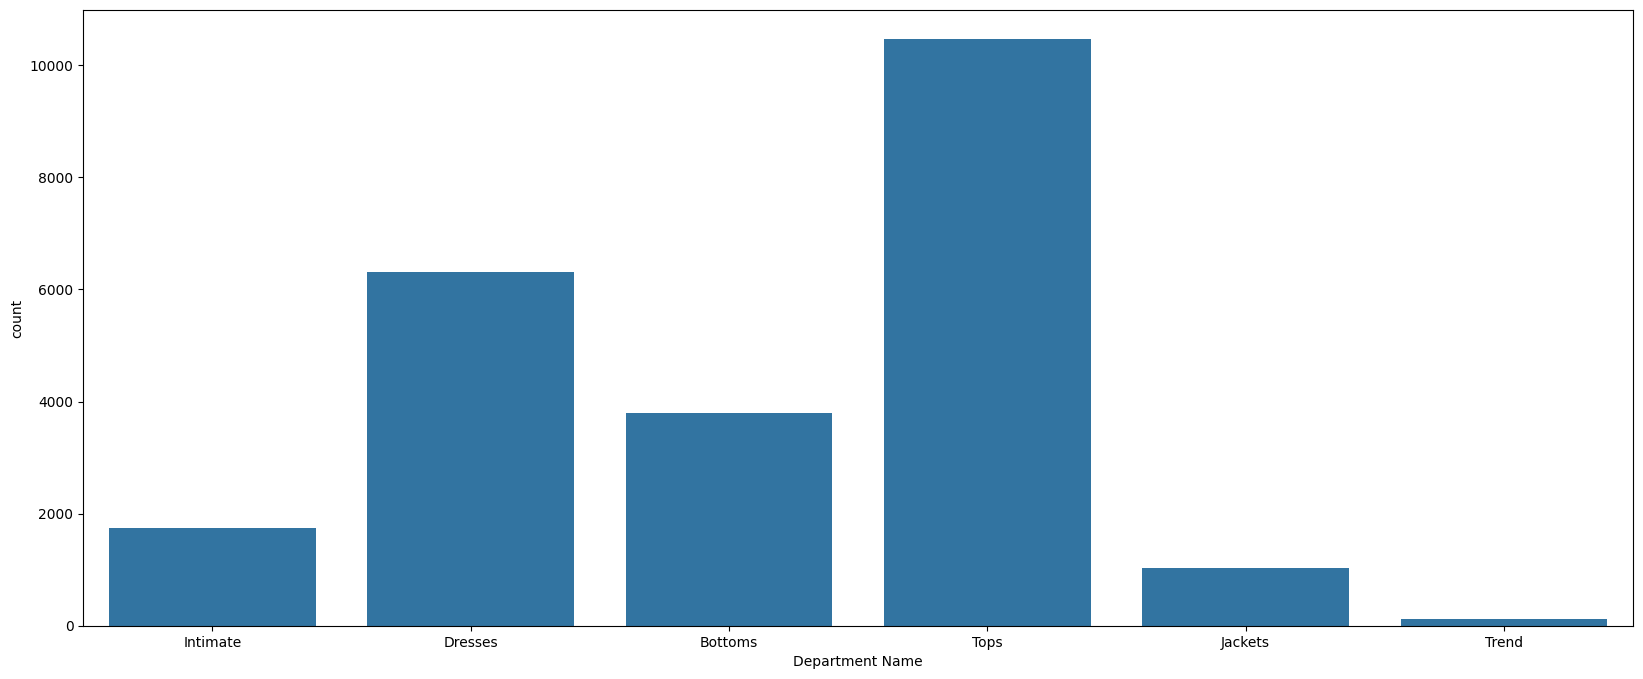

In [ ]:
cat = fashion2['Department Name'].value_counts()
cat

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(x=fashion2['Department Name'])

kategori `Tops` merupakan kategori yang paling diminati, disusul dengan `Dresses` dan `Bottoms`

akan lebih baik jika untuk produk dengan kategori2 tersebut, dapat didistribusikan lebih banyak dan selalu ready stock. agar daya beli dari toko dapat meningkatkan revenue

In [ ]:
fashion2['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

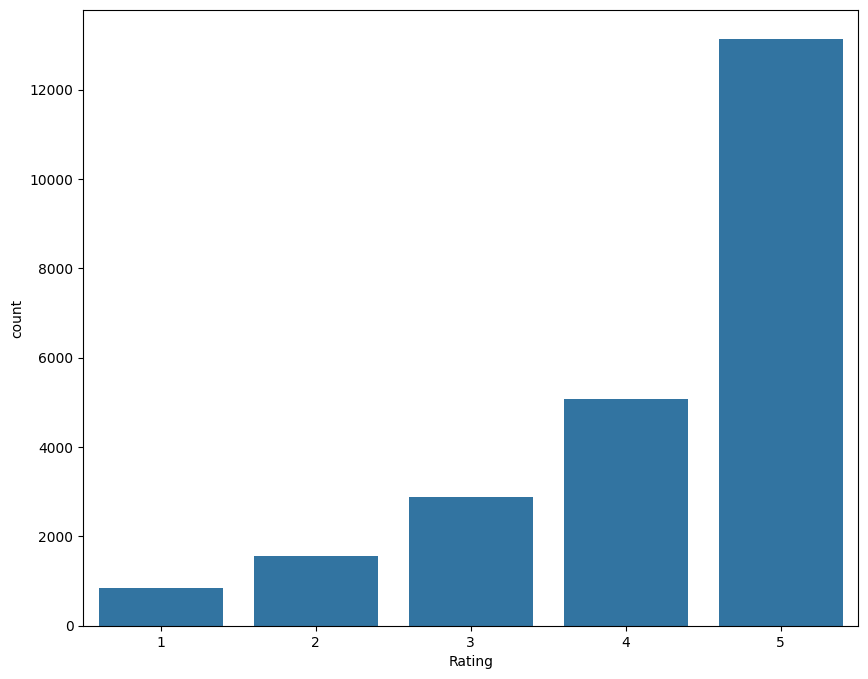

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Rating", data=fashion2)

rating 5 menduduki rating terbanyak, yang menandakan user puas akan produk yang dijual di ecommerce.

In [ ]:
fashion2['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

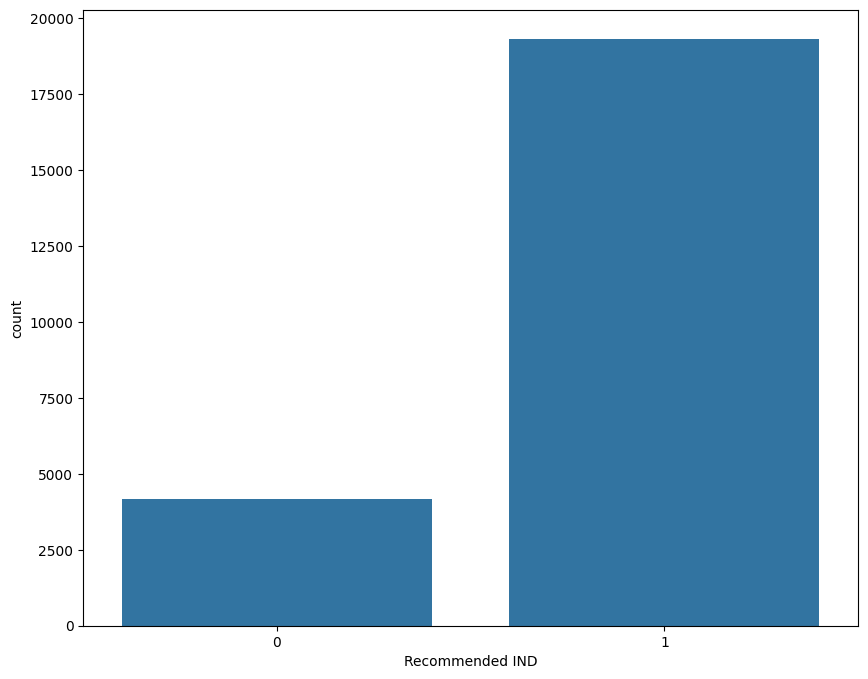

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Recommended IND", data=fashion2)

user sangat merekomendasikan produk yang mereka beli, ini merupakan hasil yang bagus. maka, para penjual dapat menjaga kualitas produk serta meningkatkan lebih lagi performanya, sehingga dapat meningkatkan revenue.

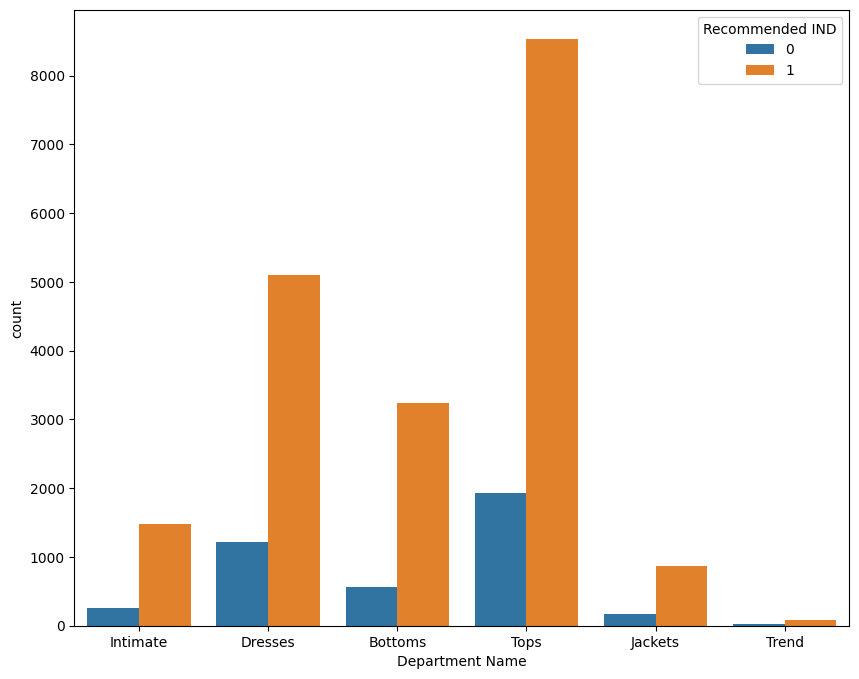

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x="Department Name", hue="Recommended IND", data=fashion2)

untuk produk dengan kategori `Tops` memiliki angka rekomendasi paling tinggi, akan tetapi juga memiliki angka tidak rekomendasi tertinggi.

sangat disarankan kepada penjual untuk melakukan quality check pada produk yang dijual, serta menjaga performanya. sedangkan untuk ecommerce sendiri dapat harus menjamin bahwa produk yang dijual di ecommerce tersebut, sudah melalui quality check yang baik.

dan juga penjual dapat memfokuskan kategori produk `Tops`, `Dresses`, dan `Bottoms`

#Modelling

In [ ]:
fashion2[['id','ClothingID','Rating']]

,id,ClothingID,Rating
0,0,767,4
1,1,1080,5
2,2,1077,3
3,3,1049,5
4,4,847,5
...,...,...,...
23481,23481,1104,5
23482,23482,862,3
23483,23483,1104,3
23484,23484,1084,3


In [ ]:
reader = Reader()
data = Dataset.load_from_df(fashion2[['id','ClothingID','Rating']], reader)

# Train & Test
trainset, testset = train_test_split(data, test_size=0.20, random_state=42)

In [ ]:
model_svd = SVD()
model_svd.fit(trainset)

##Matrix Factorization with SVD

keunggulan menggunakan model SVD adalah:


*   memberikan rekomendasi yang sangat personal karena mempertimbangkan pola preferensi pengguna berdasarkan histori interaksi mereka dengan item dan pola kesamaan dengan pengguna lain.
*   mampu mengatasi masalah Cold Start
*   fleksibelitas terhadap jenis data



In [ ]:
#SVD
prediction = model_svd.fit(trainset).test(testset)

# Prediksi
prediction

[Prediction(uid=21213, iid=1081, r_ui=4.0, est=4.274095617719967, details={'was_impossible': False}),
 Prediction(uid=191, iid=895, r_ui=2.0, est=4.344549661986209, details={'was_impossible': False}),
 Prediction(uid=12901, iid=1078, r_ui=3.0, est=4.163154372071556, details={'was_impossible': False}),
 Prediction(uid=13233, iid=1078, r_ui=4.0, est=4.163154372071556, details={'was_impossible': False}),
 Prediction(uid=12629, iid=820, r_ui=4.0, est=4.22356984796429, details={'was_impossible': False}),
 Prediction(uid=4485, iid=850, r_ui=2.0, est=4.389627085052248, details={'was_impossible': False}),
 Prediction(uid=9783, iid=824, r_ui=4.0, est=4.229571165702466, details={'was_impossible': False}),
 Prediction(uid=3924, iid=460, r_ui=2.0, est=4.317943906240201, details={'was_impossible': False}),
 Prediction(uid=9940, iid=873, r_ui=4.0, est=4.319590006125364, details={'was_impossible': False}),
 Prediction(uid=22881, iid=945, r_ui=5.0, est=4.216954305380767, details={'was_impossible': Fal

In [ ]:
#Testing
recom_svd = model_svd.predict(uid='21213', iid='1081')
recom_svd

Prediction(uid='21213', iid='1081', r_ui=None, est=4.196987438790718, details={'was_impossible': False})

dari hasik prediksi di atas, memungkinkan untuk merekomendasikan produk dengan id=1081 kepada user id 21213

#K-NN

In [ ]:
#mengubah rating ke string

def rate_into_obj(x):
  if x<2:
    return 'under 2'
  elif x>=2 and x<=4:
    return 'between 2 and 4'
  elif x>4:
    return 'upper 4'

fashion2['rating_str'] = fashion2['Rating'].apply(rate_into_obj)

In [ ]:
#encode
rating_fashion2 = pd.get_dummies(fashion2['rating_str'])
rating_fashion2

,between 2 and 4,under 2,upper 4
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
23481,0,0,1
23482,1,0,0
23483,1,0,0
23484,1,0,0


In [ ]:
#menggabungkan 3 kolom

feature = pd.concat([rating_fashion2, fashion2['Rating'], fashion2['Class Name']],axis=1)
feature.set_index('Class Name',inplace=True)
feature

,between 2 and 4,under 2,upper 4,Rating
Class Name,,,,
Intimates,1,0,0,4
Dresses,0,0,1,5
Dresses,1,0,0,3
Pants,0,0,1,5
Blouses,0,0,1,5
...,...,...,...,...
Dresses,0,0,1,5
Knits,1,0,0,3
Dresses,1,0,0,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

In [ ]:
min_max_scaler = MinMaxScaler()
feature_scale = min_max_scaler.fit_transform(feature)
feature_scale

array([[1.  , 0.  , 0.  , 0.75],
       [0.  , 0.  , 1.  , 1.  ],
       [1.  , 0.  , 0.  , 0.5 ],
       ...,
       [1.  , 0.  , 0.  , 0.5 ],
       [1.  , 0.  , 0.  , 0.5 ],
       [0.  , 0.  , 1.  , 1.  ]])

##Modelling

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='brute', metric='cosine')
model.fit(feature_scale)
dist, idlist = model.kneighbors(feature_scale)

In [ ]:
def product_recommended(class_name=list(fashion2['Class Name'].value_counts().index)):
  class_list_name = []
  item_id = fashion2[fashion2['Class Name']==class_name].index
  item_id = item_id[0]
  for new_id in idlist[item_id]:
    class_list_name.append(fashion2.loc[new_id]['Class Name'])
  return class_list_name

In [ ]:
product_recommended('Jeans')

['Knits',
 'Lounge',
 'Knits',
 'Dresses',
 'Dresses',
 'Knits',
 'Dresses',
 'Shorts',
 'Dresses',
 'Knits']